# Brazilian e-Commerce: Customer Segmentation
## Created by: Mohammad Lutfi Mahatir

### **BUSINESS PROBLEM UNDERSTANDING**

**Context:**

Olist merupakan sebuah e-commerce asal Brasil yang menghubungkan penjual dan pembeli secara online. Selain menjadi tempat bertemunya penjual dan pembeli, Olist memiliki beberapa fitur untuk menunjang fungsi platformnya, seperti integrasi dengan berbagai pasar e-commerce, pemrosesan pembayaran, dan pengiriman produk. 

Olist baru saja mendapatkan funding yang terbilang besar dan cukup untuk mendanai sebuah campaign marketing untuk semakin mendapatkan pangsa pasar yang lebih luas dan dapat meningkatkan revenur. Di tengah persaingan pasar yang semakin ketat serta untuk mempertahankan posisi di pasar yang semakin kompetitif, tim marketing Olist ingin melakukan sebuah penetrasi pasar kepada segmen yang masih kecil atau belum banyak dimasuki sehingga market share Olist bisa menjadi lebih besar dan seiring berjalannya waktu dapat meningkatkan pendapatan Olist.

**Problem Statement :**

Penetrasi pasar yang ingin dilakukan Olist dapat tercapai dengan meneliti lebih lanjut purchasing power di platform Olist yang terbilang sangat bervariasi.

Oleh karena itu tim marketing Olist akan bekerja sama dengan tim data untuk dapat mensegmentasikan pelanggan berdasarkan purchasing power mereka sehingga dapat menciptakan strategi pemasaran yang tepat dan menyesuaikan layanan yang diberikan kepada pelanggan.

**Goals :**

- Memahami profil dan customer behaviour di platform Olist.
- Mendapatkan segmentasi pelanggan yang tepat.
- Menciptakan strategi pemasaran Olist dengan mempertimbangkan customer behaviour dan purchasing power pelanggan yang berbeda-beda.

**Analytic Approach :**

Untuk mencapai tujuan di atas, berikut adalah beberapa analisis dan teknik yang bisa dilakukan:

- Pengelompokan pelanggan (clustering) untuk memahami perilaku pembelian yang berbeda-beda.
- Validasi cluster dengan memeriksa perbedaan karakteristik antara kelompok.

**Metric Evaluation**

Untuk mengevaluasi hasil segmentasi, beberapa metrik evaluasi yang bisa digunakan antara lain:

- Silhouette Score untuk mengevaluasi kualitas cluster.

### **Data Understanding**

In [66]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [67]:
# Load Dataset
customers_df = pd.read_csv('olist_customers_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
items_df = pd.read_csv('olist_order_items_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
payments_df = pd.read_csv('olist_order_payments_dataset.csv')
geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
categories_df = pd.read_csv('product_category_name_translation.csv')

In [68]:
# Menampilkan tiap dataset
display(customers_df.head(2))
display(orders_df.head(2))
display(items_df.head(2))
display(products_df.head(2))
display(sellers_df.head(2))
display(reviews_df.head(2))
display(payments_df.head(2))
display(geolocation_df.head(2))
display(categories_df.head(2))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


Berdasarkan dataset di atas, terdapat nama kategori produk dengan bahasa brasil dan bahasa inggris.

Oleh karena itu, kita akan menggunakan nama kategori produk bahasa inggris saja dan akan drop nama kategori produk dengan bahasa brasil.

**Merge categories_df and product_df dataframes to use the English names**

In [69]:
# Mengganti product_category_name dengan product_category karena menggunakan bahasa inggris
products = pd.merge(products_df, categories_df, on='product_category_name', how='left')

# Delete 'product_category_name' column
del products['product_category_name']

# Delete  the categories_df dataframe
del categories_df

# Rename the column
products.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

**Merge Dataset**

In [70]:
# Merge dataset
df = pd.merge(orders_df, customers_df, on='customer_id')
df = df.merge(items_df, on='order_id')
df = df.merge(payments_df, on='order_id')
df = df.merge(products, on='product_id')

In [74]:
# Menampilkan dataset yang telah digabungkan
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,18.59,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,3,37.77,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,1,37.77,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,...,10,748.24,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,sports_leisure
117597,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,...,10,748.24,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,sports_leisure
117598,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,a49e8e11e850592fe685ae3c64b40eca,83870,...,1,71.04,34.0,372.0,2.0,300.0,16.0,6.0,12.0,musical_instruments
117599,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,3,85.08,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0,health_beauty


Hasil dari merge datasets ini adalah sebuah dataframe yang terdiri atas 117601 baris dan 30 kolom.

In [72]:
# Membuat duplikat dataframe
dfa = df.copy()

In [73]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in dfa.columns:
    listItem.append([col, dfa[col].dtype, dfa[col].isna().sum(), round((dfa[col].isna().sum()/len(dfa[col]))*100, 2),
                    dfa[col].nunique(), list(dfa[col].drop_duplicates().sample(2).values)]);

dfa_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfa_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,order_id,object,0,0.00,98665,"[09f08a5ef3dbd9a7c895c647f30bb059, 25807a51c61..."
1,customer_id,object,0,0.00,98665,"[e39d2fd67a0ec9911767537c9dc2458e, 6937b8b182c..."
2,order_status,object,0,0.00,7,"[invoiced, canceled]"
3,order_purchase_timestamp,object,0,0.00,98111,"[2018-05-20 15:23:41, 2017-06-01 10:35:51]"
4,order_approved_at,object,15,0.01,90173,"[2018-05-18 23:53:38, 2018-04-11 08:50:44]"
5,order_delivered_carrier_date,object,1245,1.06,81016,"[2018-04-13 19:31:09, 2017-06-08 08:57:09]"
6,order_delivered_customer_date,object,2567,2.18,95663,"[2018-02-14 13:14:00, 2018-07-06 18:15:29]"
7,order_estimated_delivery_date,object,0,0.00,449,"[2018-04-26 00:00:00, 2017-03-15 00:00:00]"
8,customer_unique_id,object,0,0.00,95419,"[945f409f3002511d41158d154c17b45e, 8f931493b31..."
9,customer_zip_code_prefix,int64,0,0.00,14976,"[32616, 89633]"


- dapat terlihat berdasarkan informasi di atas bahwa beberapa kolom memiliki missing values.
- untuk mengatasi hal tersebut, saya akan melihat presentase missing valuesnya, jika rendah maka missing values akan di drop.
- ada beberapa kolom dengan dtypes yang kurang tepat, seperti `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date` `order_delivered_customer_date`, `order_estimated_delivery_date`. Saya akan mengubahnya.

### **Data Preprocessing**

In [75]:
# Drop kolom yang tidak dibutuhkan
dfa = dfa.drop(['customer_id', 'customer_zip_code_prefix', 
               'seller_id', 'shipping_limit_date', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
               'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)

In [77]:
# Memeriksa presentase missing values pada tiap kolom
((dfa.isnull().sum())/len(dfa))*100

order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.012755
order_delivered_carrier_date     1.058664
order_delivered_customer_date    2.182805
order_estimated_delivery_date    0.000000
customer_unique_id               0.000000
customer_city                    0.000000
customer_state                   0.000000
order_item_id                    0.000000
product_id                       0.000000
price                            0.000000
freight_value                    0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
product_category                 1.465124
dtype: float64

Presentase missing values pada tiap kolom terbilang rendah, maka saya akan drop baris yang memiliki missing values tersebut.

In [78]:
# Menghapus missing values
dfa.dropna(inplace=True)

In [79]:
# Memeriksa missing values
dfa.isnull().sum().sort_values(ascending=True)

order_id                         0
payment_installments             0
payment_type                     0
payment_sequential               0
freight_value                    0
price                            0
product_id                       0
order_item_id                    0
payment_value                    0
customer_state                   0
customer_unique_id               0
order_estimated_delivery_date    0
order_delivered_customer_date    0
order_delivered_carrier_date     0
order_approved_at                0
order_purchase_timestamp         0
order_status                     0
customer_city                    0
product_category                 0
dtype: int64

- Data sudah tidak memiliki missing values

In [80]:
# Menampilkan informasi mengenai jumlah baris dan kolom
dfa.shape

(113368, 19)

In [81]:
# Memeriksa duplikat
dfa.duplicated().sum()

0

- Data tidak memiliki duplikat

In [82]:
# Convert date columns to datetime format
dfa['order_purchase_timestamp'] = pd.to_datetime(dfa['order_purchase_timestamp'])
dfa['order_approved_at'] = pd.to_datetime(dfa['order_approved_at'])
dfa['order_delivered_carrier_date'] = pd.to_datetime(dfa['order_delivered_carrier_date'])
dfa['order_delivered_customer_date'] = pd.to_datetime(dfa['order_delivered_customer_date'])
dfa['order_estimated_delivery_date'] = pd.to_datetime(dfa['order_estimated_delivery_date'])

In [83]:
# Menampilkan informasi mengenai tipe data
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113368 entries, 0 to 117600
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113368 non-null  object        
 1   order_status                   113368 non-null  object        
 2   order_purchase_timestamp       113368 non-null  datetime64[ns]
 3   order_approved_at              113368 non-null  datetime64[ns]
 4   order_delivered_carrier_date   113368 non-null  datetime64[ns]
 5   order_delivered_customer_date  113368 non-null  datetime64[ns]
 6   order_estimated_delivery_date  113368 non-null  datetime64[ns]
 7   customer_unique_id             113368 non-null  object        
 8   customer_city                  113368 non-null  object        
 9   customer_state                 113368 non-null  object        
 10  order_item_id                  113368 non-null  int64         
 11  

Dtypes yang kurang tepat pada penjelasan di atas sudah ditanggulangi.

In [84]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in dfa.columns:
    listItem.append([col, dfa[col].dtype, dfa[col].isna().sum(), round((dfa[col].isna().sum()/len(dfa[col]))*100, 2),
                    dfa[col].nunique(), list(dfa[col].drop_duplicates().sample(2).values)]);

dfa_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfa_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,order_id,object,0,0.0,95110,"[ae76bef74b97bcb0b3e355e60d9a6f9c, a005841d24a..."
1,order_status,object,0,0.0,2,"[canceled, delivered]"
2,order_purchase_timestamp,datetime64[ns],0,0.0,94606,"[2018-04-07T01:12:14.000000000, 2018-08-03T10:..."
3,order_approved_at,datetime64[ns],0,0.0,87113,"[2018-06-26T21:30:18.000000000, 2018-08-14T18:..."
4,order_delivered_carrier_date,datetime64[ns],0,0.0,78910,"[2018-08-17T10:40:00.000000000, 2018-05-30T09:..."
5,order_delivered_customer_date,datetime64[ns],0,0.0,94322,"[2018-02-07T17:42:55.000000000, 2017-11-21T18:..."
6,order_estimated_delivery_date,datetime64[ns],0,0.0,444,"[2017-11-29T00:00:00.000000000, 2017-10-06T00:..."
7,customer_unique_id,object,0,0.0,92063,"[580670a27cdf4e994deb2c8c8e669a46, 814bce430ba..."
8,customer_city,object,0,0.0,4073,"[imperatriz, nanuque]"
9,customer_state,object,0,0.0,27,"[RO, SC]"


`dfa` akan menjadi data yang akan kita gunakan untuk Exploratory Data Analysis di bawah.

#### **Exploratory Data Analysis**

#### **Mayoritas pelanggan berada**

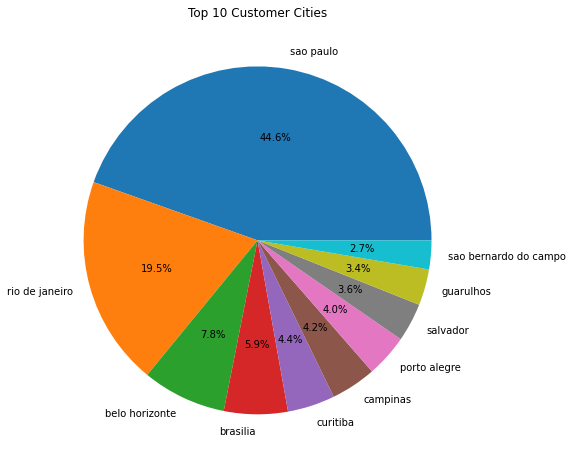

In [17]:
# Plot the pie chart of customer cities
plt.figure(figsize=(8,8))
city_counts = dfa['customer_city'].value_counts().head(10)
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Customer Cities')
plt.show()

Berdasarkan visualisasi di atas, 44.6% customer kita berada pada Sao Paulo dan 19.5% berada Rio De Janeiro yang menjadikan temuan ini sebagai mayoritas customer kita berada.

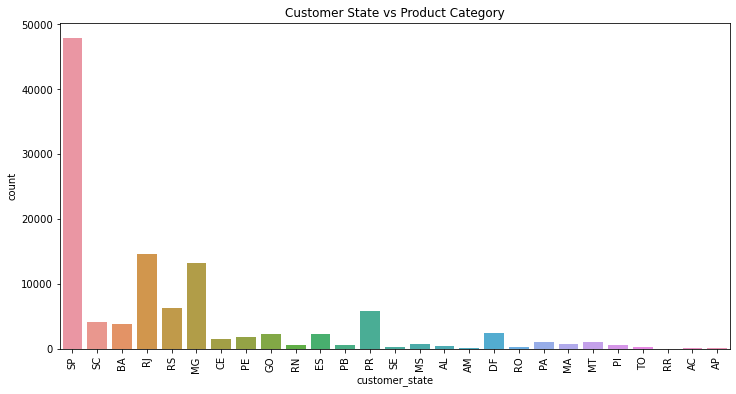

In [18]:
# Plot the bar chart of customer state vs product category
plt.figure(figsize=(12,6))
sns.countplot(x='customer_state', data=dfa)
plt.xticks(rotation=90)
plt.title('Customer State vs Product Category')
plt.show()

Berdasarkan analisa sebelumnya di atas yang menunjukan bahwa mayoritas customer kita berada di Sao Paulo dan Rio De Janeiro, hal tersebut juga sejalan dengan analisa di atas.

Visualisasi di atas menunjukan bahwa banyak product category yang terjual juga banyak di Sao Paulo dan Rio De Janeiro.

#### **Tahun dengan jumlah order terbanyak**

In [19]:
# Membagi value pada kolom waktu menjadi tahun, bulan, hari, dan jam 
dfa['order_purchase_year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.year
dfa['order_purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
dfa['order_purchase_day'] = pd.to_datetime(df['order_purchase_timestamp']).dt.day
dfa['order_purchase_hour'] = pd.to_datetime(df['order_purchase_timestamp']).dt.hour

# Number of orders per year and month
orders = dfa[['order_id', 'order_purchase_year', 'order_purchase_month']]
orders = orders.groupby(['order_purchase_month', 'order_purchase_year']).count().reset_index()
orders = orders.sort_values(by=['order_purchase_year', 'order_purchase_month'])
orders["period"] =  orders["order_purchase_month"].astype(str) + "/" + orders["order_purchase_year"].astype(str)
orders

,order_purchase_month,order_purchase_year,order_id,period
17,10,2016,334,10/2016
20,12,2016,1,12/2016
0,1,2017,949,1/2017
2,2,2017,1893,2/2017
4,3,2017,3014,3/2017
6,4,2017,2628,4/2017
8,5,2017,4161,5/2017
10,6,2017,3627,6/2017
12,7,2017,4655,7/2017
14,8,2017,4974,8/2017


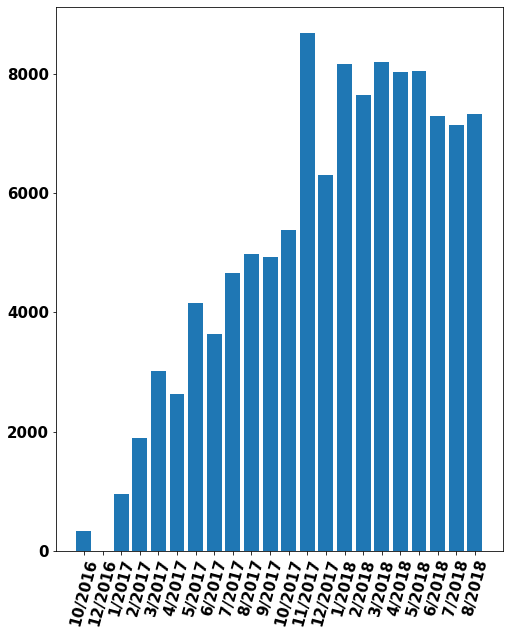

In [20]:
plt.figure(figsize=(8,10))
plt.bar(orders['period'], orders['order_id'])
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

Dapat dilihat dari visualisasi di atas bahwa tahun 2018 merupakan tahun dengan order terbanyak dibandingkan tahun 2016 dan tahun 2017. Hal tersebut bisa konfirmasi dengan tabel di bawah:

In [21]:
orders.groupby(['order_purchase_year']).sum()

,order_purchase_month,order_id
order_purchase_year,,
2016,22,335
2017,78,51192
2018,36,61841


#### **Top 10 Categories**

In [22]:
top_categories = df[['product_category', 'order_item_id']]
top_categories = top_categories.groupby(['product_category']).sum().sort_values(by=['order_item_id'], ascending=False).reset_index()
top_categories[:10]

,product_category,order_item_id
0,bed_bath_table,14539
1,furniture_decor,12055
2,health_beauty,11426
3,sports_leisure,10279
4,computers_accessories,10186
5,housewares,9530
6,watches_gifts,6811
7,garden_tools,6129
8,telephony,5349
9,auto,5042


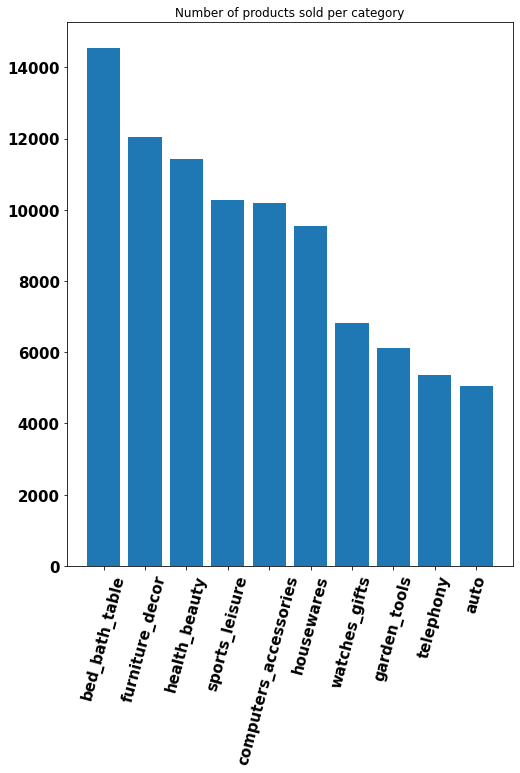

In [23]:
plt.figure(figsize=(8,10))
plt.bar(top_categories['product_category'][:10], top_categories['order_item_id'][:10])
plt.title('Number of products sold per category')
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

Top 10 category dengan produk terbanyak dibeli pada posisi 1 sampai 3 ada pada `bed_bath_table`, `furniture_decor`, dan `health_beauty`.

### **Create Dataset: Feature Enginering**

In [24]:
# Drop beberapa kolom waktu
dfa = dfa.drop(['order_approved_at', 'order_purchase_timestamp', 'order_delivered_carrier_date', 
             'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)

In [25]:
# Menampilkan data final
dfa

,order_id,order_status,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,1,credit_card,1,18.12,housewares,2017,10,2,10
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,3,voucher,1,2.00,housewares,2017,10,2,10
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,2,voucher,1,18.59,housewares,2017,10,2,10
3,128e10d95713541c87cd1a2e48201934,delivered,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,7.78,1,credit_card,3,37.77,housewares,2017,8,15,18
4,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,7.78,1,credit_card,1,37.77,housewares,2017,8,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,e8fd20068b9f7e6ec07068bb7537f781,delivered,fb9310710003399b031add3e55f34719,sao paulo,SP,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,1,credit_card,10,748.24,sports_leisure,2017,8,10,21
117597,e8fd20068b9f7e6ec07068bb7537f781,delivered,fb9310710003399b031add3e55f34719,sao paulo,SP,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,1,credit_card,10,748.24,sports_leisure,2017,8,10,21
117598,cfa78b997e329a5295b4ee6972c02979,delivered,a49e8e11e850592fe685ae3c64b40eca,campo do tenente,PR,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,1,credit_card,1,71.04,musical_instruments,2017,12,20,9
117599,9c5dedf39a927c1b2549525ed64a053c,delivered,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,1,credit_card,3,85.08,health_beauty,2017,3,9,9


In [26]:
# Menyeleksi feature yang akan digunakan untuk modeling
columns = ['price', 'freight_value', 'payment_value']
dfa_model = dfa[columns]
dfa_model.head()

,price,freight_value,payment_value
0,29.99,8.72,18.12
1,29.99,8.72,2.00
2,29.99,8.72,18.59
3,29.99,7.78,37.77
4,29.99,7.78,37.77


In [27]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in dfa_model.columns:
    listItem.append([col, dfa_model[col].dtype, dfa_model[col].isna().sum(), round((dfa_model[col].isna().sum()/len(dfa_model[col]))*100, 2),
                    dfa_model[col].nunique(), list(dfa_model[col].drop_duplicates().sample(2).values)]);

dfa_desc_model = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfa_desc_model

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,price,float64,0,0.0,5790,"[37.88, 207.0]"
1,freight_value,float64,0,0.0,6902,"[51.38, 65.5]"
2,payment_value,float64,0,0.0,28374,"[208.03, 168.32]"


### **Scaling Data**

In [28]:
# Import library
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [29]:
# Melakukan scaling
scaller = StandardScaler()

df_prepared = scaller.fit_transform(dfa_model)
df_prepared

array([[-0.49338444, -0.71758716, -0.57802834],
       [-0.49338444, -0.71758716, -0.63848741],
       [-0.49338444, -0.71758716, -0.57626558],
       ...,
       [-0.35163916, -0.31005086, -0.3795486 ],
       [-0.26356124, -0.44081796, -0.32689071],
       [-0.28270861, -0.10564792, -0.32021471]])

In [30]:
# Menginput data df_prepared ke dalam dataframe
df_prepared = pd.DataFrame(df_prepared)

In [31]:
# Menampilkan data yang akan dijadikan model
df_prepared

,0,1,2
0,-0.493384,-0.717587,-0.578028
1,-0.493384,-0.717587,-0.638487
2,-0.493384,-0.717587,-0.576266
3,-0.493384,-0.777258,-0.504330
4,-0.493384,-0.777258,-0.504330
...,...,...,...
113363,1.290111,-0.120883,2.160332
113364,1.290111,-0.120883,2.160332
113365,-0.351639,-0.310051,-0.379549
113366,-0.263561,-0.440818,-0.326891


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Mencari best K
n_clusters = [3, 4, 5, 7]
silhouette_scores = []

for K in n_clusters:
    initialized_clusters = KMeans(n_clusters = K, random_state = 10)
    data_fitted_clusters = initialized_clusters.fit_predict(df_prepared)
    silhoette_score = silhouette_score(df_prepared, data_fitted_clusters, random_state = 10)
    silhouette_scores.append(silhoette_score)

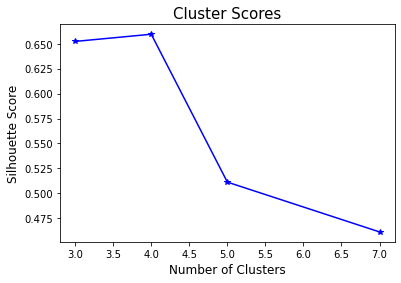

In [33]:
# Membuat plot untuk menampilkan best K yang sudah kita buat di atas
plt.plot(n_clusters, silhouette_scores, color = 'b', marker = '*')
plt.title('Cluster Scores', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Silhouette Score', fontsize = 12)
plt.show()

In [34]:
# Final model

df_final = KMeans(n_clusters=4, random_state=10)
df_final.fit(df_prepared)

KMeans(n_clusters=4, random_state=10)

In [35]:
# Menambahkan kolom 'cluster' ke dalam dataframe untuk modeling
data_output = df_prepared.copy()
data_output['Cluster'] = df_final.labels_
data_output.sample(5)

,0,1,2,Cluster
19239,-0.279973,-0.567142,-0.345606,1
47692,0.655513,-0.029473,0.327507,1
111540,-0.366410,-0.970234,0.326757,1
54238,-0.456020,-0.105648,-0.439033,1
54430,0.157681,-0.268789,-0.027933,1


In [36]:
# Membuat dataframe untuk menciptakan plot PCA
pca = PCA(n_components = 4)
x_pca = pca.fit_transform(data_output)
df_pca = pd.DataFrame(x_pca, data_output['Cluster'])
df_pca.reset_index(inplace=True)
df_pca

,Cluster,0,1,2,3
0,1,-1.011623,0.211531,-0.068917,-0.148662
1,1,-1.048433,0.189455,-0.111338,-0.144999
2,1,-1.010550,0.212175,-0.067680,-0.148769
3,1,-0.995788,0.284138,-0.017958,-0.178204
4,1,-0.995788,0.284138,-0.017958,-0.178204
...,...,...,...,...,...
113363,0,1.968646,1.727162,0.520602,0.564681
113364,0,1.968646,1.727162,0.520602,0.564681
113365,1,-0.604479,0.014630,-0.024929,-0.010458
113366,1,-0.581371,0.160546,-0.052018,-0.081672


Text(0, 0.5, 'Komponen 2')

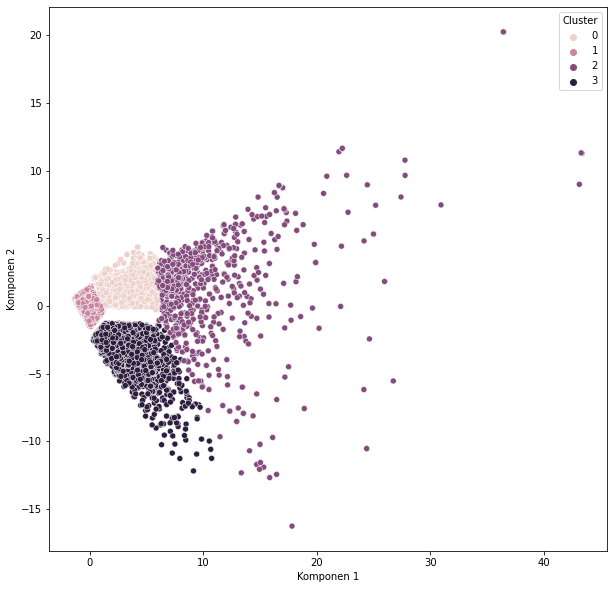

In [37]:
# Membuat plot yang akan menampilkan bentuk clustering
plt.figure(figsize=(10,10))
sns.scatterplot(
    x_pca[:,0],
    x_pca[:,1],
    hue= df_pca['Cluster']
)

plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')

In [38]:
# Menggabungkan kolom 'cluster' ke dalam dataframe yang akan kita gunakan untuk cluster analysis
df_final = pd.merge(dfa, data_output[['Cluster']], left_index=True, right_index=True)

In [39]:
# Menampilkan dataframe
df_final

,order_id,order_status,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour,Cluster
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,1,credit_card,1,18.12,housewares,2017,10,2,10,1
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,3,voucher,1,2.00,housewares,2017,10,2,10,1
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,2,voucher,1,18.59,housewares,2017,10,2,10,1
3,128e10d95713541c87cd1a2e48201934,delivered,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,7.78,1,credit_card,3,37.77,housewares,2017,8,15,18,1
4,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,7.78,1,credit_card,1,37.77,housewares,2017,8,2,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113363,3382c4920abfc57a48aa39d9120f3f67,delivered,8daed8656ebd5207d291f66538455e05,valinhos,SP,1,5fedaa257cce9d3db6da91f9cfd815c1,30.00,8.82,1,credit_card,1,77.64,baby,2018,5,7,12,0
113364,3382c4920abfc57a48aa39d9120f3f67,delivered,8daed8656ebd5207d291f66538455e05,valinhos,SP,2,5fedaa257cce9d3db6da91f9cfd815c1,30.00,8.82,1,credit_card,1,77.64,baby,2018,5,7,12,0
113365,626ba2cf9fa985ffe2bf41c0b1b12b4f,delivered,a28a5bf286affa0abc5f7dbc1ccb6a2d,brasilia,DF,1,bf379ee1c9b696f70f97027e92279497,29.90,14.10,1,credit_card,4,44.00,housewares,2017,11,12,12,1
113366,8618c8cd264cece4218bfa403bdc4b14,delivered,eaa62b5b7b97dfc5b7f233e7ca718d7d,fazenda rio grande,PR,1,8df319d9f48776cb857c83625848367e,135.00,16.05,1,boleto,1,151.05,computers_accessories,2018,8,7,14,1


### **Cluster Analysis**

### **Berapa banyak customer pada tiap cluster?**

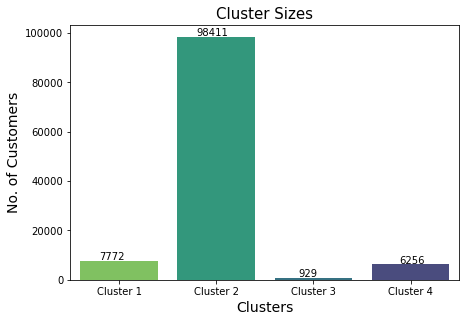

In [40]:
# Menampilkan plot
sns.countplot(data = data_output, x = 'Cluster', palette = 'viridis_r')
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('No. of Customers', fontsize = 14)
plt.xticks([0, 1, 2, 3], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], rotation = 0)
plt.text(x = 0 - 0.2, y = data_output.Cluster.value_counts()[0] + 500, s = data_output.Cluster.value_counts()[0])
plt.text(x = 1 - 0.2, y = data_output.Cluster.value_counts()[1] + 500, s = data_output.Cluster.value_counts()[1])
plt.text(x = 2 - 0.15, y = data_output.Cluster.value_counts()[2] + 500, s = data_output.Cluster.value_counts()[2])
plt.text(x = 3 - 0.12, y = data_output.Cluster.value_counts()[3] + 500, s = data_output.Cluster.value_counts()[3])
plt.tight_layout(pad = -1)
plt.show()

- Dari bar chart di atas, dapat diketahui bahwa kebanyakan customers berada pada cluster 2 sebanyak 96411 customer. Sedangkan cluster 3 hanya memiliki 929 customer, dan cluster 1 dan 4 memiliki 7772 dan 6256 customer.

### **Top 5 Product tiap cluster**

In [42]:
# Membuat subset data untuk setiap cluster
cluster1 = df_final[df_final['Cluster'] == 0]
cluster2 = df_final[df_final['Cluster'] == 1]
cluster3 = df_final[df_final['Cluster'] == 2]
cluster4 = df_final[df_final['Cluster'] == 3]

# Menampilkan top 5 produk per cluster
top5_cluster1 = cluster1.groupby(['product_id', 'product_category'])['payment_value'].nlargest(5)
top5_cluster2 = cluster2.groupby(['product_id', 'product_category'])['payment_value'].nlargest(5)
top5_cluster3 = cluster3.groupby(['product_id', 'product_category'])['payment_value'].nlargest(5)
top5_cluster4 = cluster4.groupby(['product_id', 'product_category'])['payment_value'].nlargest(5)

In [43]:
top5_cluster1.head(5)

product_id                        product_category             
001b237c0e9bb435f2e54071129237e9  bed_bath_table         107028    100.09
0021a87d4997a48b6cef1665602be0f5  computers_accessories  81769      20.00
002af88741ba70c7b5cf4e4a0ad7ef85  cool_stuff             100844    330.66
0075c14603d80515e20908c156ceb47b  sports_leisure         69518      68.13
00878d953636afec00d3e85d55a12e7f  health_beauty          85453     126.78
Name: payment_value, dtype: float64

In [44]:
top5_cluster2.head(5)

product_id                        product_category        
0009406fd7479715e4bef61dd91f2462  bed_bath_table    96718     242.10
000d9be29b5207b54e86aa1b1ac54872  watches_gifts     110600    218.27
0011c512eb256aa0dbbb544d8dffcf6e  auto              84714     166.40
00126f27c813603687e6ce486d909d01  cool_stuff        74512     265.49
                                                    74511     262.24
Name: payment_value, dtype: float64

In [45]:
top5_cluster3.head(5)

product_id                        product_category        
008b51e6be49ee039854b5e35c331b02  watches_gifts     104747    323.52
00de7f393d962717eeeb2d7131a40dba  telephony         50210     342.09
01a977e282d5884149e79181506c0941  toys              110539     52.63
022ff42cced44a2b2cca57061cabb526  sports_leisure    81901     454.48
026b77b15418f2a8114dfb0026739be4  sports_leisure    62099     132.54
Name: payment_value, dtype: float64

In [46]:
top5_cluster4.head(5)

product_id                        product_category       
000b8f95fcb9e0096488278317764d19  housewares        86028     78.50
                                                    86029     78.50
001795ec6f1b187d37335e1c4704762e  consoles_games    65122     96.48
                                                    65123     96.48
002959d7a0b0990fe2d69988affcbc80  furniture_decor   56808    227.92
Name: payment_value, dtype: float64

### **Proporsi transaksi tiap cluster**

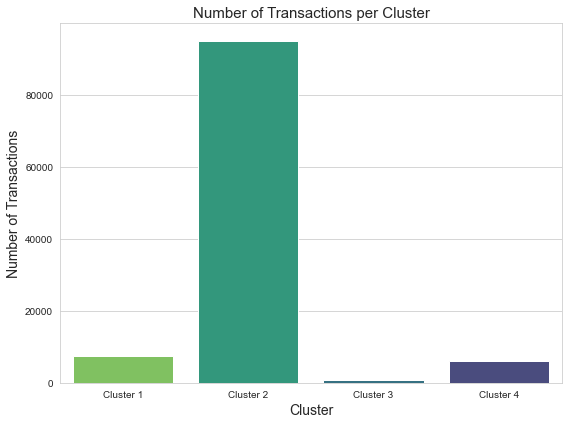

In [56]:
# Menghitung jumlah transaksi per cluster
order_count = df_final.groupby('Cluster')['order_id'].count().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(data = order_count, x = 'Cluster', y = 'count', palette = 'viridis_r')
plt.title('Number of Transactions per Cluster', fontsize=15)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(np.arange(4), ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, Cluster 2 memiliki proporsi transaksi paling banyak di antara cluster lainnya. Hal ini masuk akal karena jumlah customer pada cluster 2 memang jauh lebih banyak di bandingkan dengan cluster yang lain.

Sementara itu, cluster 3 memiliki jumlah proporsi transaksi paling sedikit jika dibandingkan dengan cluster yang lain. Cluster 1 dan cluster 4 memiliki jumlah transaksi yang hampir sama.

### **Tipe pembayaran tiap cluster**

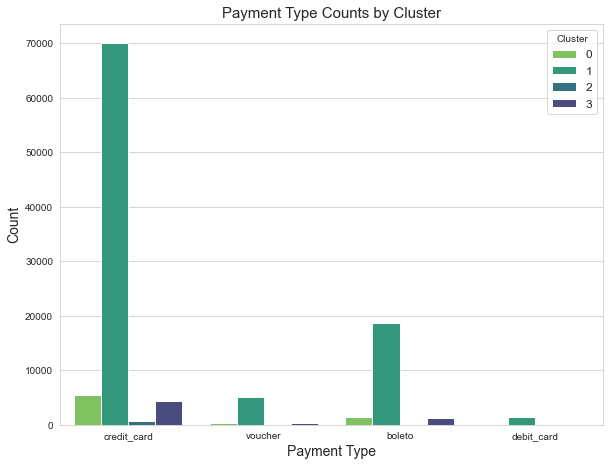

In [50]:
# create a bar plot of payment type counts by cluster
plt.figure(figsize=(8,6))
sns.countplot(x='payment_type', hue='Cluster', data=df_final, palette='viridis_r')
plt.title('Payment Type Counts by Cluster', fontsize=15)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cluster', fontsize=12, loc='best')
plt.tight_layout(pad=-1)
plt.show()

Dari visualisasi tersebut, dapat dilihat bahwa di tiap cluster, mayoritas pembayaran dilakukan melalui metode 'credit_card', diikuti dengan 'boleto' dan 'voucher'. Namun, proporsi penggunaan metode pembayaran berbeda-beda di setiap cluster. Cluster 1 dan 4 memiliki proporsi penggunaan 'credit_card' lebih tinggi dibandingkan dengan cluster 2 dan 3 yang memiliki proporsi penggunaan 'boleto' dan 'voucher' yang lebih tinggi.

### **Result & Conclusion**

Cluster 1 (7772 customers): Cluster dengan top 5 category produk yang di antaranya berupa `bed_bath_table`, `computer_accessories`, `cool_stuff`, `sports_leisure`, dan `health_beauty`. Dengan jumlah proporsi transaksi yang terbilang rendah dan menggunakan `credit_card` sebagai tipe pembayarannya.

Cluster 2 (96411 customers): Cluster dengan top 5 category produk yang di antaranya berupa `bed_bath_table`, `watches_gifts`, `auto`, dan `cool_stuff`. Cluster ini memiliki jumlah customers paling banyak dan proporsi yang terbilang sangat tinggi jika dibandingkan dengan cluster lainnya dan suka menggunkan `credit_card` sebagai tipe pembayarannya.

Cluster 3 (929 customers): Cluster dengan jumlah customers yang paling sedikit di antara cluster lainnya memiliki top 5 category yang di antaranya berupa `watches_gifts`, `telephony`, `toys`, dan `sport_leisure`. Proporsi transaksi yang ada pada cluster ini juga terbilang rendah, namun berdasarkan top 5 category productnya, cluster ini suka berbelanja product yang terbilang mahal seperti `watches_gifts` dan menggunakan `credit_card` sebagai tipe pembayarannya.

Cluster 4 (6256 customers): Cluster ini memiliki top 5 category yang di antaranya berupa `housewares`, `consoles_games`, dan `furniture_decor`. Cluster ini memiliki proporsi transaksi yang terbilang rendah juga dan menggunakan `credit_card` sebagai tipe pembayarannya.

#### **Recommendation**

Cluster 1:
Berdasarkan top 5 category produk yang dibeli dan proporsi transaksi yang terbilang rendah, kita dapat melakukan penetrasi untuk meningkatkan transaksi yang dilakukan pada cluster ini dengan cara pemberian diskon atau promo free shipping pada category produk yang tidak termasuk di dalam top 5 category product cluster 1. Selain itu, kita perlu selalu keep in touch dengan cluster ini dengan memberikan rekomendasi produk langsung melalui surel tiap customers.

Cluster 2:
Cluster ini memiliki jumlah pelanggan terbanyak, dan terbilang sangat sering melakukan pembelian. Cluster ini sangat suka berbelanja kebutuhan rumah bahkan produk dengan category yang terbilang mahal seperti `watches_gifts`. Oleh karena itu, kita dapat membuat sebuah program subscription dimana keuntungan yang di dapat berupa menjadi prioritas layanan customer care, endless promo, hingga subscription kepada mitra yang bekerja sama dengan kita.
Berdasarkan subscription tersebut, customer pada cluster ini diharap akan selalu melakukan transaksi pada cluster kita.

Cluster 3:
Cluster ini merupakan kelompok customer dengan jumlah terendah, namun membeli produk dengan nilai yang cukup tinggi seperti `watches_gifts`. Kita perlu untuk melakukan penetrasi yang dapat meningkatkan jumlah transaksi yang dilakukan pada cluster ini dengan cara merekomendasikan produk kebutuhan sehari-hari serta memberikan promo bundle product.

Cluster 4:
Cluster ini adalah cluster yang sangat sering melakukan pembelian pada product category `housewares` dan `furniture_decor`. Walaupun proporsi transaksinya terbilang rendah, kita dapat meningkatkan jumlah transaksinya dengan cara merekomendasikan produk kebutuhan rumah yang lebih detail. Promo seperti diskon barang, bundle product, hingga free shipping dapat kita berikan pada cluster ini. Serta untuk selalu menjaga kepercayaan, kita perlu melakukan regulasi keamanan pada barang-barang yang dibeli pada cluster ini, sehingga mereka bisa merasa puas dan melakukan repeat order di platform kita.